## Problem 1_SMDM

##### A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail).

1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel seems to spend more? Which Region and which Channel seems to spend less?

1.2 There are 6 different varieties of items are considered. Do all varieties show similar behaviour across Region and Channel?  Provide justification for your answer

1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

1.4 Are there any outliers in the data?

1.5 On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective

Import OS and set the file path we will use below block

In [38]:
import os
os.chdir("C:\\Users\\suhas\\Desktop\\Great Learning\\2.STATISTICS\\FinalAssignment_STATISTICS")
os.getcwd()
# The desired path is set where the csv file is kept

'C:\\Users\\suhas\\Desktop\\Great Learning\\2.STATISTICS\\FinalAssignment_STATISTICS'

In [39]:
# Importing pandas to perform different Dataframe operations
import pandas as pd

# Importing numpy to perform different array, list and numerical operations
import numpy as np

# To plot charts, graphs we will use matplotlib
import matplotlib.pyplot as plt

# Seaborn library used on top of matplotlib, which used for interactive and user friendly visualization
import seaborn as sns

# importing scipy library for statistical operations.
import scipy.stats as stats


# Sometimes we get warning not errors, so filter out that we can use below Warnings library
import warnings
warnings.filterwarnings('ignore')


In [40]:
# Read data from CSV file and store it into a new data frame df.
df=pd.read_csv('Wholesale+Customers+Data.csv')

### Question 1.1

##### 1.1.1 Use methods of descriptive statistics to summarize data.

In [41]:
# We are guessing the dataset, so first 5 rows will give us basic idea about dataset
df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [42]:
# We are Interested in how many unique regions are there where data is spread, so by unique operations on dataframe we will get three Regions
df['Region'].unique()
# So tatal three regions are there('Other', 'Lisbon', 'Oporto') 

array(['Other', 'Lisbon', 'Oporto'], dtype=object)

In [43]:
# Describe command will give us detailed value analysis, Mean, Standard Deviation, 25%,50%,75 % Values and min-max value.
df.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,220.500000,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,440.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [44]:
# Info command will give us Data type of Column,Non-Null count, In below table 440 Non Null means no null values are present
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [45]:
# is null command will return True if value is Null and appending sum to it, it will count TRUE values.
# Count is 0 means no null values are present in dataset.
df.isnull().sum()

Buyer/Spender       0
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

##### 1.1.2  Which Region and which Channel seems to spend more? 

In [46]:
df['Region'].unique()

array(['Other', 'Lisbon', 'Oporto'], dtype=object)

In [47]:
df_Region=df.groupby('Region').sum()
df_Region

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Region,,,,,,,
Lisbon,18095,854833,422454,570037,231026,204136,104327
Oporto,14899,464721,239144,433274,190132,173311,54506
Other,64026,3960577,1888759,2495251,930492,890410,512110


In [48]:
column_list = list(df_Region)
column_list.remove('Buyer/Spender')
column_list

['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']

In [49]:
df_Region[column_list]
df_Region[column_list].sum(axis=0)
df_Region[column_list].sum(axis=1)
df_Region["sum"]=df_Region[column_list].sum(axis=1)
df_Region

Regionwise_max=pd.DataFrame(data=df_Region, columns=['sum'] )
Regionwise_max[Regionwise_max['sum'] == Regionwise_max['sum'].max()]

# Other Region seems to spend more

,sum
Region,
Other,10677599


In [50]:
df['Channel'].unique()


array(['Retail', 'Hotel'], dtype=object)

In [51]:
# Print dataframe, where addition done for different channels with different Varieties.
df_channel=df.groupby('Channel').sum()
df_channel

# From the Dataframe generated above, we are removing Buyer/Spender column as it is not useful here
list2=list(df_channel)
list2.remove('Buyer/Spender')
list2

# Passing the Above created list to Dataframe df_Channel and addition will be done by using sum function on dataframe
df_channel2=df_channel[list2]
df_channel2['sum']=df_channel2.sum(axis=1)
df_channel2


df_channel3=df_channel2[df_channel2['sum']==df_channel2['sum'].max()]
df_channel4=pd.DataFrame(data= df_channel3,columns=['sum'])
df_channel4

# Hotel Channel Seems to Spend Higher



,sum
Channel,
Hotel,7999569


##### 1.1.3 Which Region and which Channel seems to spend less?

In [52]:
Regionwise_min=Regionwise_max[Regionwise_max['sum'] == Regionwise_max['sum'].min()]
Regionwise_min

# Oporto region seems to Spend Less

,sum
Region,
Oporto,1555088


In [53]:
# Retail Channel which has Lowest Spending
df_channel5=df_channel2[df_channel2['sum']==df_channel2['sum'].min()]
df_channel6=pd.DataFrame(data= df_channel5,columns=['sum'])
df_channel6

,sum
Channel,
Retail,6619931


### Question 1.2

There are 6 different varieties of items are considered. Do all varieties show similar behaviour across Region and Channel? Provide justification for your answer

In [54]:
dfd=df.drop(['Buyer/Spender'], axis='columns')

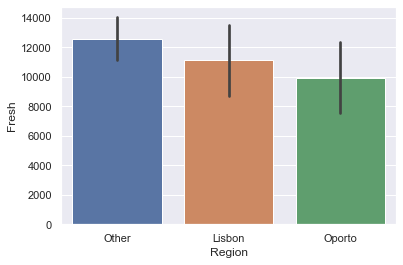

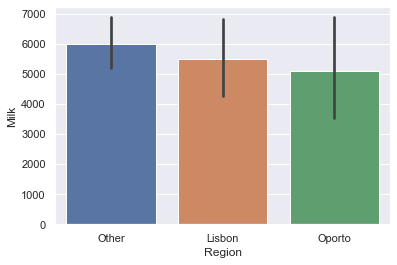

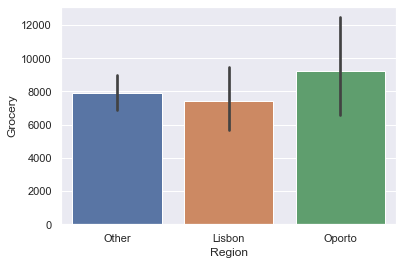

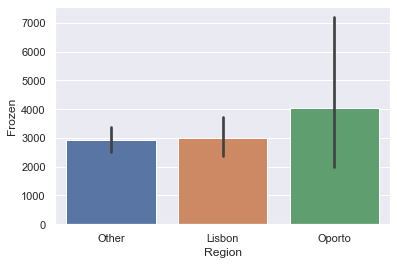

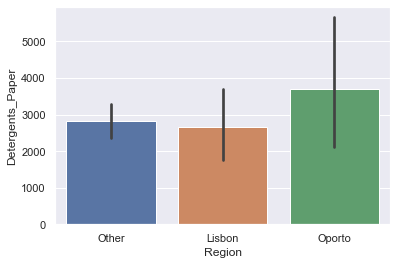

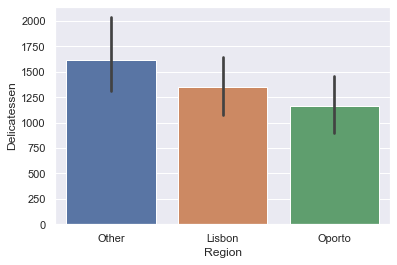

In [55]:
# ALl Varieties Across Region
for i in dfd.columns:
    if dfd[i].dtypes != "object":
        sns.barplot(df['Region'],dfd[i])
        plt.show()

If we see Graph1 for 'Fresh' variety - Other Region has highest mean value so it is highly bought variety as comapre to Lisbon and Oporto region.This variety is not showing similar nature in case of average selling.

If we see Graph2 for 'Milk' variety - Other Region has highest mean value so it is highly bought variety as comapre to Lisbon and Oporto region.This variety is not showing similar nature in case of average selling.

If we see Graph3 for 'Grocery' variety - Oporto Region has highest mean value so it is highly bought variety as comapre to Lisbon and Oporto region.This variety is not showing similar nature in case of average selling.

If we see Graph4 for 'Frozen' variety - Oporto Region has highest mean value so it is highly bought variety as comapre to Lisbon and Oporto region.This variety is not showing similar nature in case of average selling.

If we see Graph5 for 'Detergent_paper' variety - Oporto Region has highest mean value so it is highly bought variety as comapre to Lisbon and Oporto region.This variety is not showing similar nature in case of average selling.

If we see Graph6 for 'Delicatessen' variety - Other Region has highest mean value so it is highly bought variety as comapre to Lisbon and Oporto region.This variety is not showing similar nature in case of average selling.

The similarity can be found is , In Nutshell, Fresh,Milk and Delicatessen are the varieties gives highest average income from Other Region and Grocery, Detergent_papers and Frozen varieties are giving highest revenue from Oporto region

Lets Check by boxplot how data is Distributed with and without considering outliers

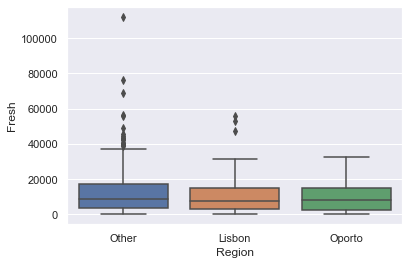

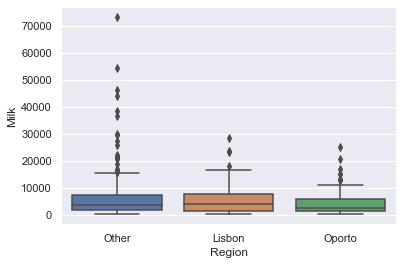

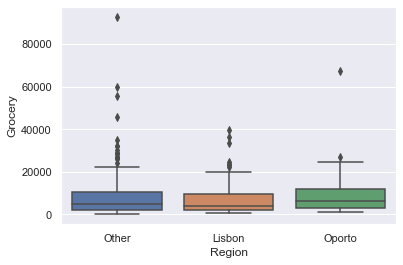

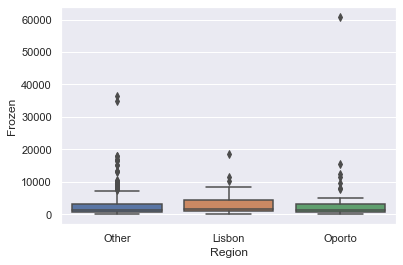

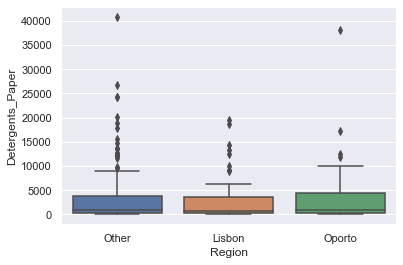

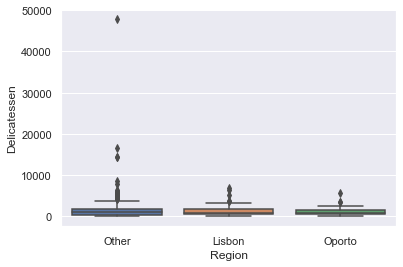

In [56]:
for i in dfd.columns:
    if df[i].dtypes != "object":
        sns.boxplot(df['Region'],df[i])
        plt.show()

Only one Combination which is "Oporto and Fresh" has no outliers and data is consistent.
While other all Varieties across region has Outliers.

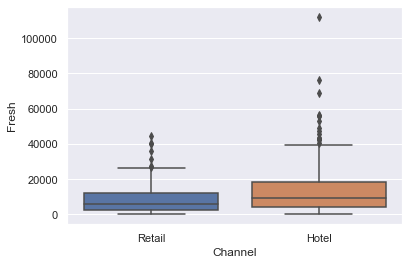

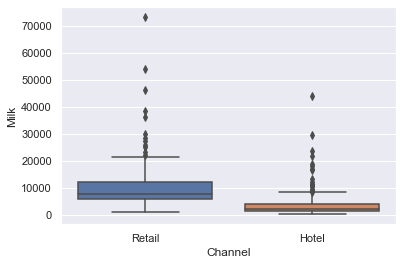

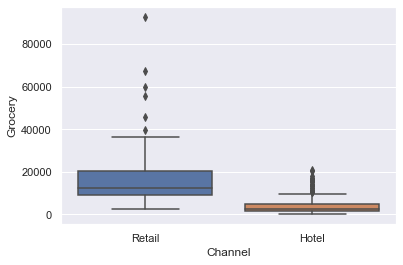

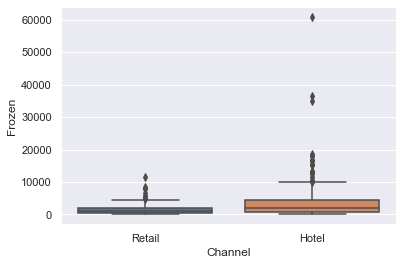

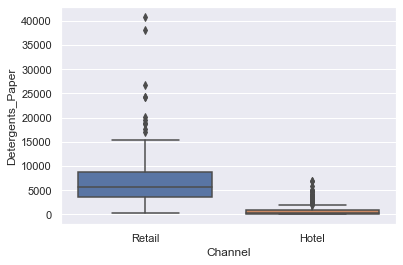

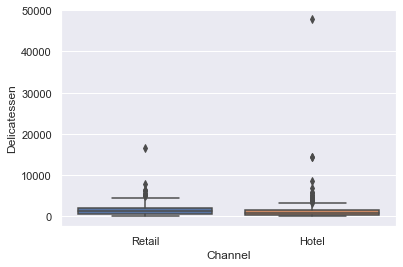

In [57]:
for i in dfd.columns:
    if df[i].dtypes != "object":
        sns.boxplot(df['Channel'],df[i])
        plt.show()

From plot 1, here it can be noticed that every variety has outliers across Channel and Fresh items are highly  sold in Hotels than Retails, and diiference is significant.
Milk, Grocery and detergent paper generating High revenues in retail sector as comapare to Hotel channel.
Delicatessen is the variety having almost similar distribution in Both the channels.


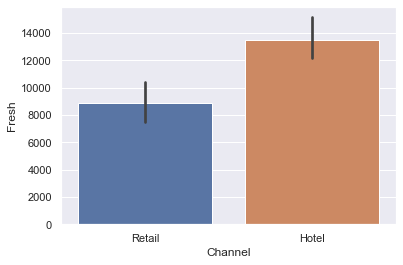

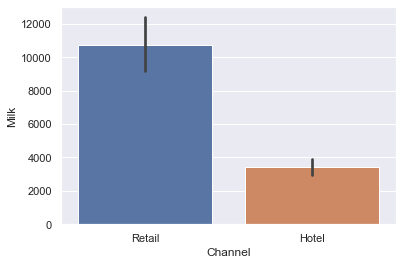

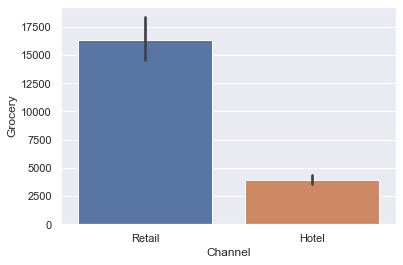

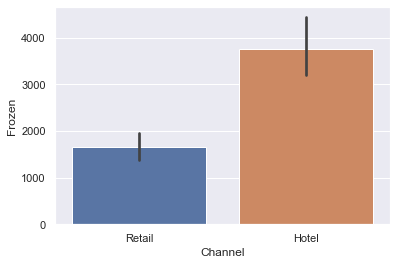

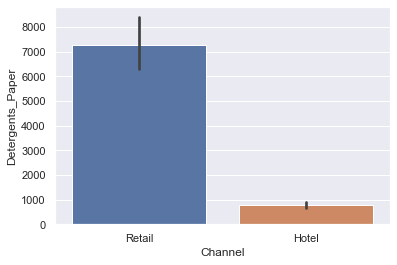

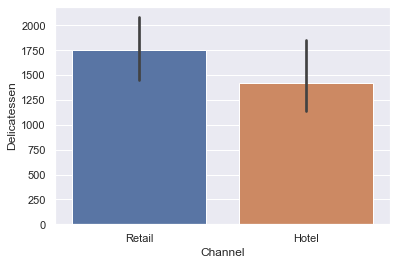

In [58]:
# All varieties across Channel.

for i in dfd.columns:
    if dfd[i].dtypes != "object":
        sns.barplot(df['Channel'],df[i])
        plt.show()

If we see Fresh and Frozen in channel Hotel has the maximum average values over Channel Retail and
Delicatessen,Detergent_paper,Milk,Grocery has highest average spendings in Retail Channel thats the inter Similarity we can get.

## Question 1.3

1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

In [59]:
df_del=df.drop(['Buyer/Spender','Channel','Region'], axis = 1) 
df_del.std()
# from the below Output Fresh has the highest Standard deviation , hence it shows Highest inconsistency whereas Delicatessen 
# has the lowest Standard deviation , hence it shows least inconsistent behaviour.

Fresh               12647.328865
Milk                 7380.377175
Grocery              9503.162829
Frozen               4854.673333
Detergents_Paper     4767.854448
Delicatessen         2820.105937
dtype: float64

In [60]:
df_del.var()
# from the below Output Fresh has the highest variance , hence it shows Highest inconsistency whereas Delicatessen 
# has the lowest variance , hence it shows least inconsistent behaviour.

Fresh               1.599549e+08
Milk                5.446997e+07
Grocery             9.031010e+07
Frozen              2.356785e+07
Detergents_Paper    2.273244e+07
Delicatessen        7.952997e+06
dtype: float64

## Question 1.4

Are there any outliers in the data?

From below boxplots, we can say that every variety has Outlier 

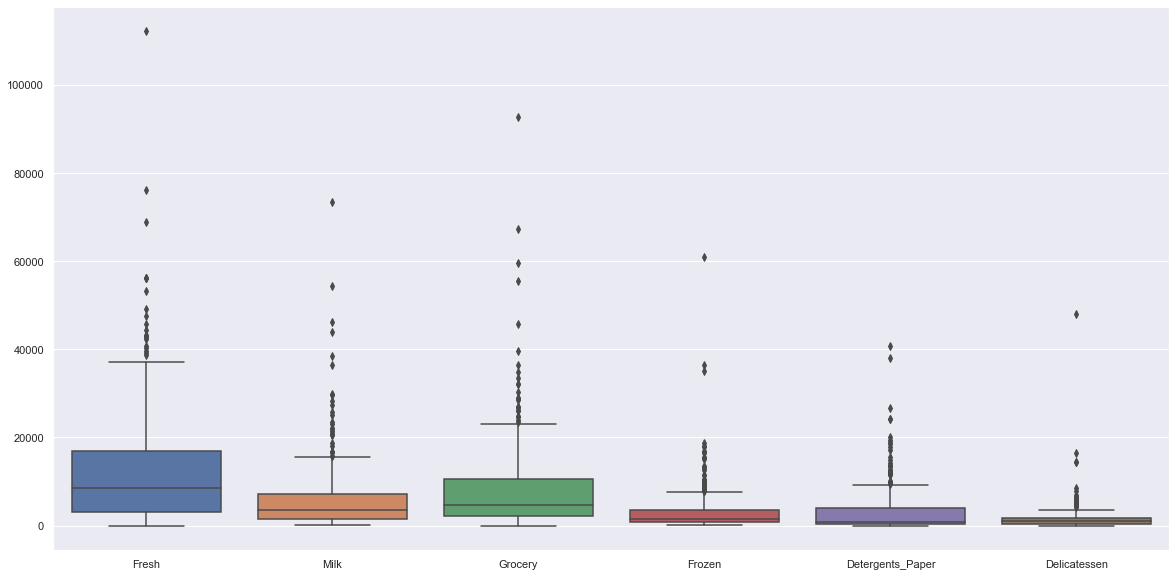

In [61]:
plt.figure(figsize=(20,10))
sns.boxplot(data=dfd)

# By observing below plot we can say that Yes All Varieties: Fresh, Milk, Frozen, Grocery, Detergents_paper, Delicatessen  have outliers.


## Question 1.5

On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective

Now for clear understanding of Distribution we can plot 6 distribuion plots for each variety having continuous distribution. 
For this we can import seaborn library which is used as top of Matplotlib for better visualiation. 


Text(0, 0.5, 'density plot for Fresh variety')

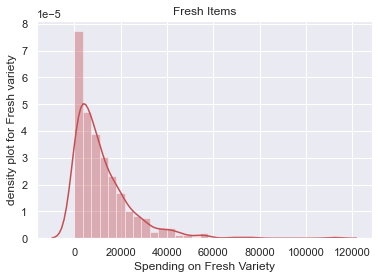

In [62]:
# From this below line, we are defining color palete we have used further for different colors R for Red
sns.set(color_codes=True)

# Here we are plotting distplot and assigning it to variale dist, color Red.
dist=sns.distplot(df['Fresh'],color='R')

# Setting Title to the graph as Fresh Items
dist.set_title('Fresh Items')

# Setting x label to the graph as Spending on Fresh Variety
dist.set_xlabel('Spending on Fresh Variety')

# Setting y label to the graph as density plot for Fresh variety
dist.set_ylabel('density plot for Fresh variety')


Maximum data points accumulated spendings in between 0 to 40000, very less buyer or Spender spent money on Fresh variety greater than 40000 and distribution is right skewed.

Text(0, 0.5, 'density plot for Milk variety')

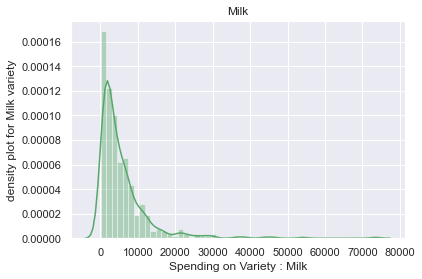

In [63]:
sns.set(color_codes=True)
dist=sns.distplot(df['Milk'],color='g')
dist.set_title('Milk')
dist.set_xlabel('Spending on Variety : Milk')
dist.set_ylabel('density plot for Milk variety')

Maximum data points accumulated spendings in between 0 to 30000, very less buyer or Spender spent money on Milk greater than 30000 and distribution is right skewed.

Text(0, 0.5, 'density plot for Grocery')

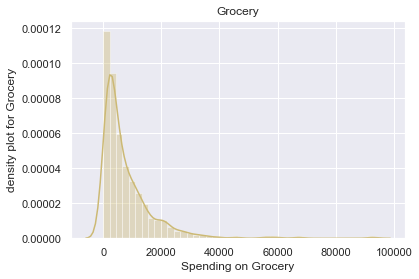

In [64]:
sns.set(color_codes=True)
dist=sns.distplot(df['Grocery'],color='y')
dist.set_title('Grocery')
dist.set_xlabel('Spending on Grocery')
dist.set_ylabel('density plot for Grocery')

Maximum data points accumulated spendings in between 0 to 30000, very less buyer or Spender spent money on Grocery greater than 30000 and distribution is right skewed.

Text(0, 0.5, 'density plot for Frozen variety')

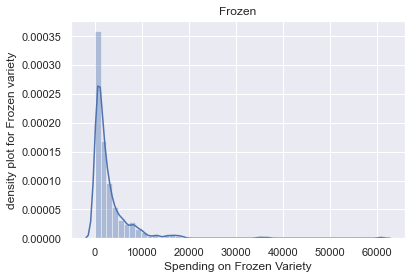

In [65]:
sns.set(color_codes=True)
dist=sns.distplot(df['Frozen'],color='b')
dist.set_title('Frozen')
dist.set_xlabel('Spending on Frozen Variety')
dist.set_ylabel('density plot for Frozen variety')

Maximum data points accumulated spendings in between 0 to 10000, very less buyer or Spender spent money on Frozen items greater than 10000 and distribution is right skewed.

Text(0, 0.5, 'density plot for Detergents_Paper')

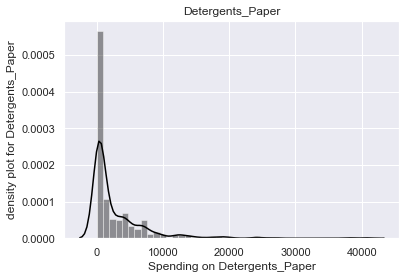

In [66]:
sns.set(color_codes=True)
dist=sns.distplot(df['Detergents_Paper'],color='black')
dist.set_title('Detergents_Paper')
dist.set_xlabel('Spending on Detergents_Paper')
dist.set_ylabel('density plot for Detergents_Paper')

Maximum data points accumulated spendings in between 0 to 10000, very less buyer or Spender spent money on Detergent_Paper greater than 10000 and distribution is right skewed.

Text(0, 0.5, 'density plot for Delicatessen variety')

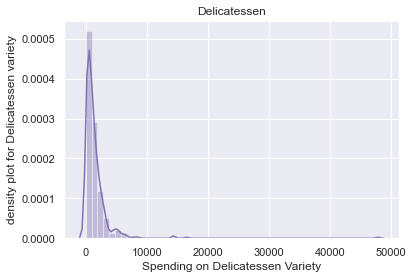

In [67]:
# From this below line, we are defining color palete we have used further for different colors 
sns.set(color_codes=True)
dist=sns.distplot(df['Delicatessen'],color='M')
dist.set_title('Delicatessen')
dist.set_xlabel('Spending on Delicatessen Variety')
dist.set_ylabel('density plot for Delicatessen variety')

Maximum data points accumulated spendings in between 0 to 9000, very less buyer or Spender spent money on Delicatessen variety greater than 9000 and distribution is right skewed.

From Above graphs, Overall Revenue for varieties and its production, Production should be high in case of Milk,Grocery,Fresh Items and also it will increase chances of Revenues and for Frozen and Detergents_Paper production should be moderate to avoid initial investment issues. And Delicatessen has low revenues, so to be in the business we should produce this in limited quantity. More Focus should be given on Milk,Grocery,Fresh till some saturation.

We can also consider some branding factor and usability of varieties such as Delicatessen,Frozen and Detergents_Paper. by collecting data, we can decide for more branding, Marketing to improve sales.

In [68]:
df_drop=df.drop(['Buyer/Spender','Channel','Region'],axis='columns')
df_drop

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


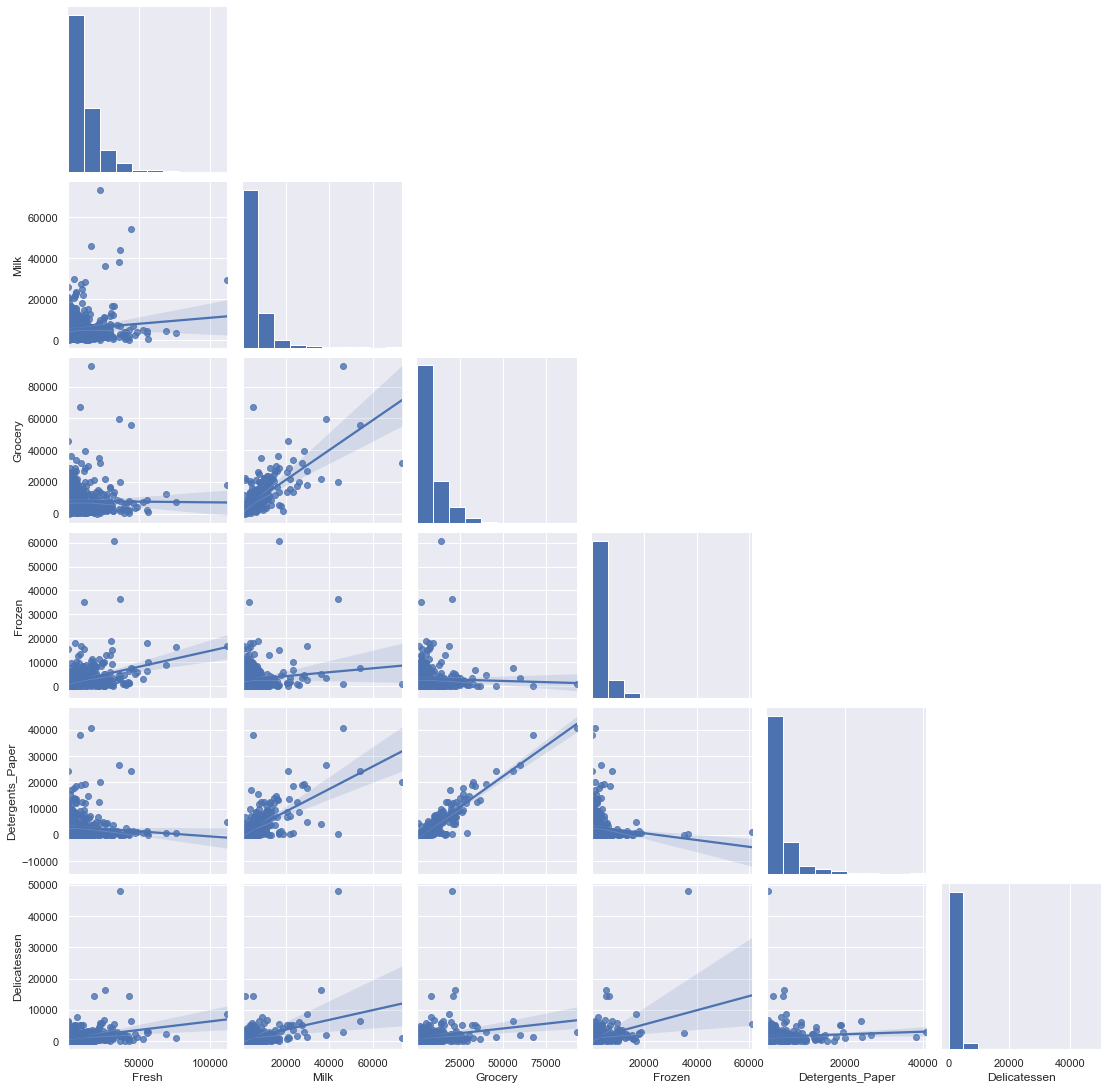

In [69]:
sns.pairplot(data=df_drop,corner=True,kind='reg')

In [70]:
df_drop.corr()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


In above correlation table,the highest correlation is between Grocery and Detergents_Paper, so it can be assumed that buyer buying Detergent_paper also buy Grocery, chances of this combination is high and folllows linear relation and directly proportional.Similarly Milk and grocery has correlation index 0.7283 which is also good, so production of these items should be increased to increase Revenue.

In [71]:
dfd1=dfd.groupby('Region').sum()
dfd1


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Region,,,,,,
Lisbon,854833,422454,570037,231026,204136,104327
Oporto,464721,239144,433274,190132,173311,54506
Other,3960577,1888759,2495251,930492,890410,512110


lets compare the total Regionwise spendings,lets plot for Region: Lisbon

Text(0.5, 1.0, 'Region : Lisbon')

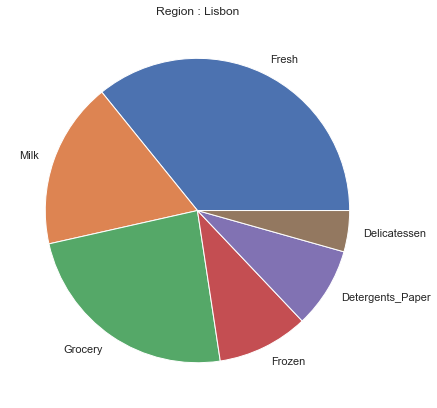

In [72]:
# To select row named as Lisbon, we use iloc function
dfd2=dfd1.iloc[0,:]
dfd2

fig = plt.figure(figsize =(10, 7)) 
varieties=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']
plt.pie(dfd2,labels=varieties) 
plt.title('Region : Lisbon')



In Lisbon Region, Fresh variety seems to be highest spending. In the Lisbon region it is generating Highest revenue whereas Delicatessen has lowest spendings

Now lets plot All varieties Spendings in Oporto, we can see below pie chart for it

Text(0.5, 1.0, 'Region : Oporto')

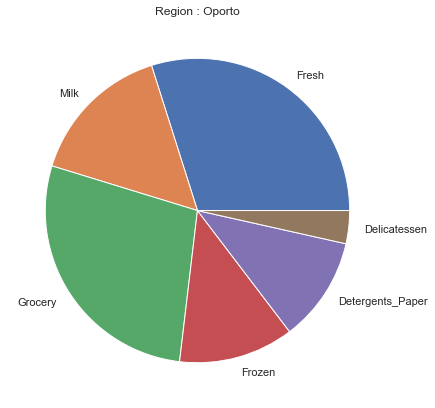

In [73]:
dfd3=dfd1.iloc[1,:]
dfd3

fig = plt.figure(figsize =(10, 7)) 
varieties=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']
plt.pie(dfd3,labels=varieties) 
plt.title('Region : Oporto')

In Oporto Region, Fresh variety seems to be highest spending. In the Oporto region it is generating Highest revenue whereas Delicatessen has lowest spendings in this region

Now lets plot All varieties Spendings in other region,

Text(0.5, 1.0, 'Region : Other')

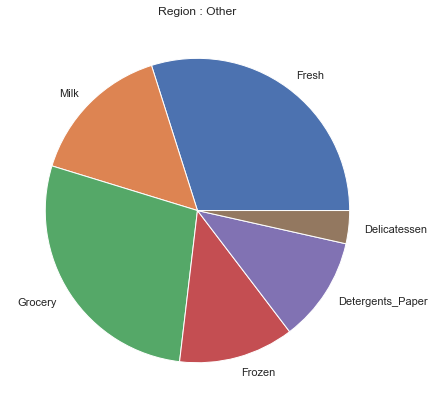

In [74]:
dfd4=dfd1.iloc[1,:]
dfd4

fig = plt.figure(figsize =(10, 7)) 
varieties=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']
plt.pie(dfd4,labels=varieties) 
plt.title('Region : Other')

In Other Region, Fresh variety seems to be highest spending. In Other region it is generating Highest revenue whereas Delicatessen has lowest spendings in this region

Overall, in all Region Fresh and Grocery are sources of Maximum income, so transport for this Varieties should be quickest,with high production and needed more focus, as compare to others